# Model Training

In [19]:
%load_ext autoreload
%autoreload 2

import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import wandb
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
wandb.login()

True

## Parameters

In [ ]:
# change this accordingly
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
save_path = f"{project_path}/scicite_preprocessed"
dataset = "selected-features-perm-top1000"
project_name = "model-comparison"

## 1. Load dataset

In [22]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

In [23]:
train_df

,citeEnd,citeStart,label,excerpt_index,source_acronym,source_explicit,source_properNoun,isKeyCitation_False,sectionName_result,ability_tfidf,...,terminus_tfidf,three different_tfidf,tidal_tfidf,took_tfidf,tucker_tfidf,type error_tfidf,usage_tfidf,zero_tfidf,zhang_tfidf,μm_tfidf
0,175.0,168.0,0,11,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.0,16.0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,228.0,225.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110.0,46.0,0,3,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,239.0,234.0,0,2,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,50.0,28.0,0,15,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8237,182.0,179.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8238,120.0,108.0,0,8,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8239,221.0,185.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Train-validation split

In [24]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

e:\cs4248_proj\nlp_proj\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
-----Evaluation-----
Accuracy: 0.6340
Macro F1-score: 0.5139
Micro F1-score: 0.6340


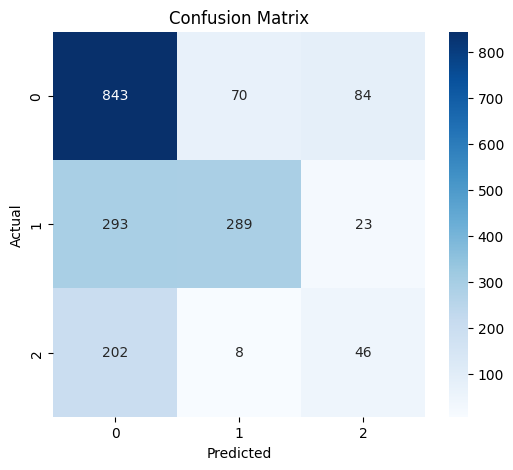

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.63402
Macro F1-score,0.51388
Micro F1-score,0.63402


In [25]:
# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="logistic-regression")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression")
wandb.finish()

## 4. Train Random Forest Classifier

Random Forest Classifier
-----Evaluation-----
Accuracy: 0.5630
Macro F1-score: 0.5269
Micro F1-score: 0.5630


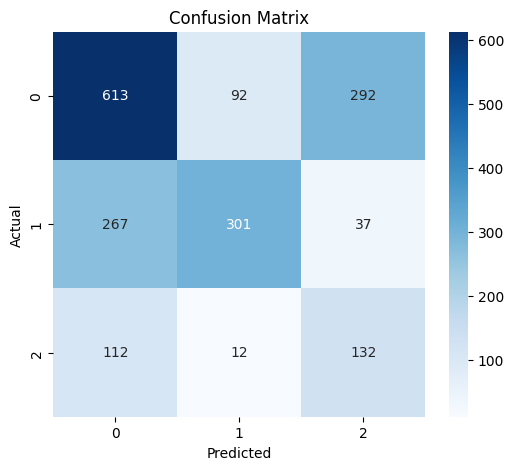

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.56297
Macro F1-score,0.52688
Micro F1-score,0.56297


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="random-forest-classifier")
common.evaluate(y_test, y_pred_rf, label_encoder, "Random Forest Classifier")
wandb.finish()

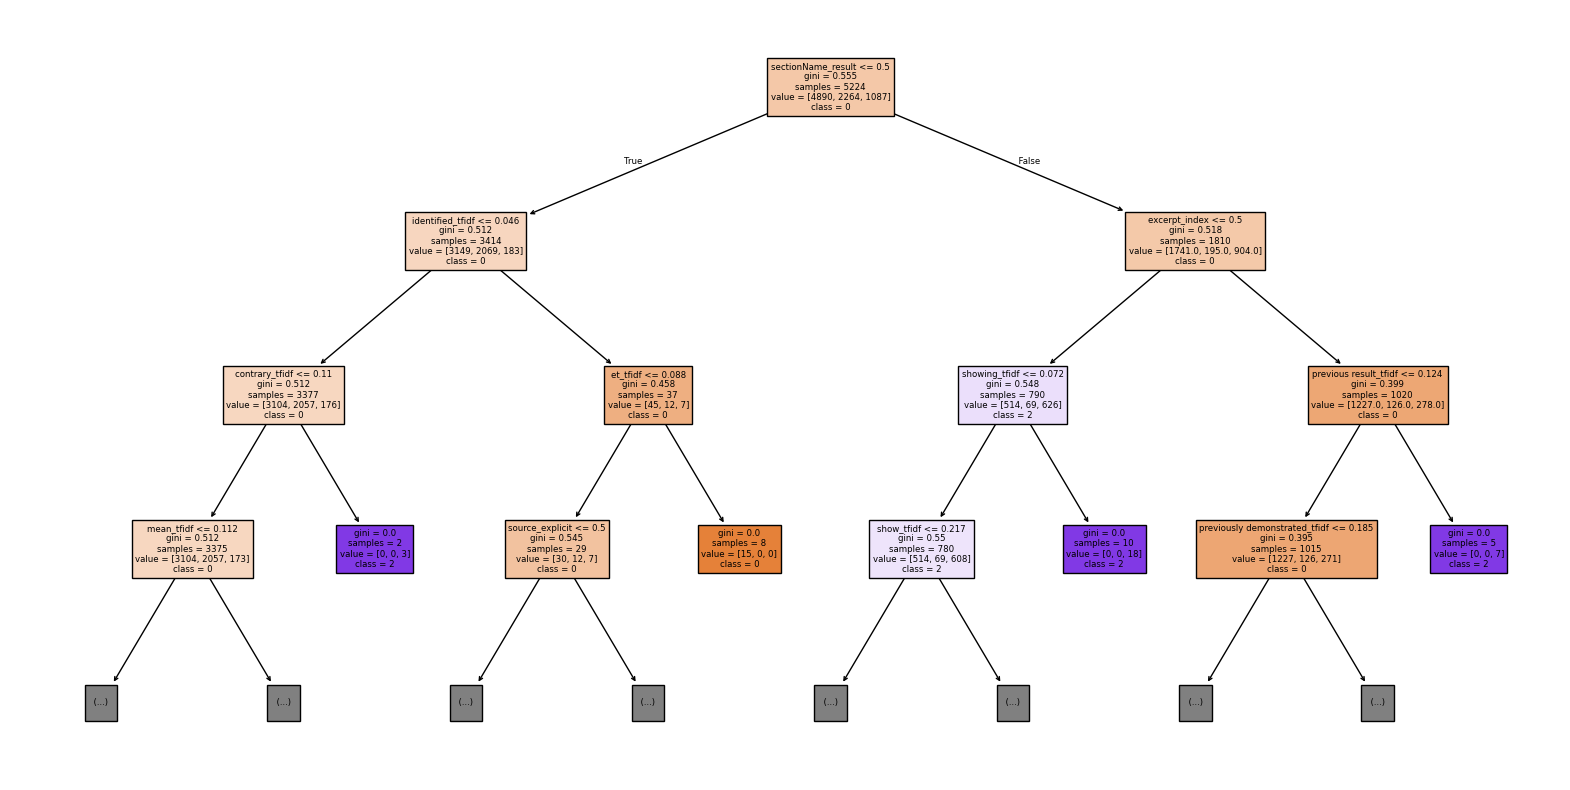

In [27]:
tree_index = 0
plt.figure(figsize=(20, 10))  # Adjust figure size for readability
class_names = [str(cls) for cls in rf_model.classes_]
class_names = class_names[0:5]
plot_tree(rf_model.estimators_[tree_index], feature_names=X_train.columns, class_names=class_names, filled=True, max_depth=3)
plt.show()

## 5. Train Support Vector Machine (SVM)

Support Vector Machine (SVM)
-----Evaluation-----
Accuracy: 0.5710
Macro F1-score: 0.3761
Micro F1-score: 0.5710


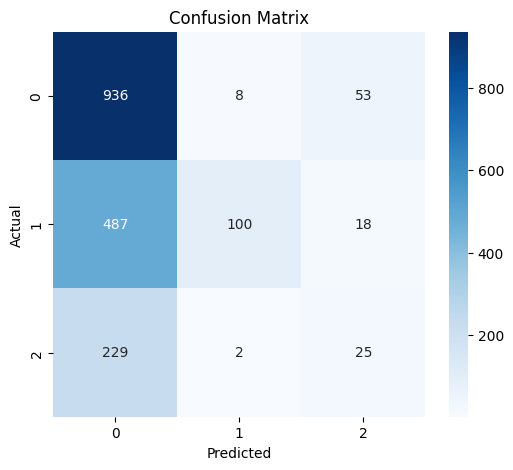

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Accuracy Score,▁
Macro F1-score,▁
Micro F1-score,▁
Accuracy Score,0.57104
Macro F1-score,0.37615
Micro F1-score,0.57104


In [28]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

wandb.init(project=f"{project_name}-{dataset}", name="support-vector-machine")
common.evaluate(y_test, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")
wandb.finish()